In [5]:
from fn_utils import *
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
import time
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Simple Convex PSO vs GD

In [6]:
# Initial Setup
from optimizer import Optimizer
from function_classes import SimpleConvex, Rastrigin, Rosenbrock
from PSO import *
function = SimpleConvex()


GD = Optimizer()
GD.initialize_particles()
GD.set_benchmark_function(function)

PSO = SwarmOptimizer(n_particles=20, v_coeff=0.5, p_coeff=1, g_coeff=0.07)
a, b = 0, 100
PSO.set_objective_function(function)
PSO.get_population()

INFO:root:Particles initialized at: [[1.8829999999995723, -0.6120000000001529], [0.6039999999997132, 0.7749999999996944], [0.8819999999996826, 1.3729999999996285], [-0.9600000000001145, -1.4330000000000624], [1.414999999999624, 0.33399999999974295], [-0.9210000000001188, 0.7519999999996969], [1.4839999999996163, -1.300000000000077], [-0.30000000000018723, -0.3030000000001869], [-0.04200000000021564, -0.3940000000001769], [-1.8470000000000169, -1.0040000000001097], [1.4169999999996237, -0.1940000000001989], [1.4249999999996228, -0.5540000000001593], [-0.7660000000001359, -1.500000000000055], [0.3069999999997459, 1.8879999999995718], [0.5069999999997239, -0.028000000000217184], [0.39099999999973667, 0.7319999999996991], [0.5739999999997165, 0.03599999999977577], [-0.7420000000001385, 1.858999999999575], [-0.5390000000001609, -0.9620000000001143], [0.9159999999996788, -0.4820000000001672]]


[array([1.448, 1.363]),
 array([ 0.454, -1.159]),
 array([-0.785,  1.211]),
 array([ 0.779, -0.906]),
 array([-1.358, -1.177]),
 array([-0.248,  0.037]),
 array([-0.415, -1.96 ]),
 array([-1.18 , -1.986]),
 array([-0.404,  0.876]),
 array([1.529, 1.942]),
 array([-0.389,  0.969]),
 array([ 1.295, -1.264]),
 array([-0.461, -1.108]),
 array([ 1.348, -0.975]),
 array([1.349, 0.273]),
 array([-0.581, -1.695]),
 array([-0.981,  1.501]),
 array([-0.156, -1.929]),
 array([0.287, 0.378]),
 array([-1.334, -0.781])]

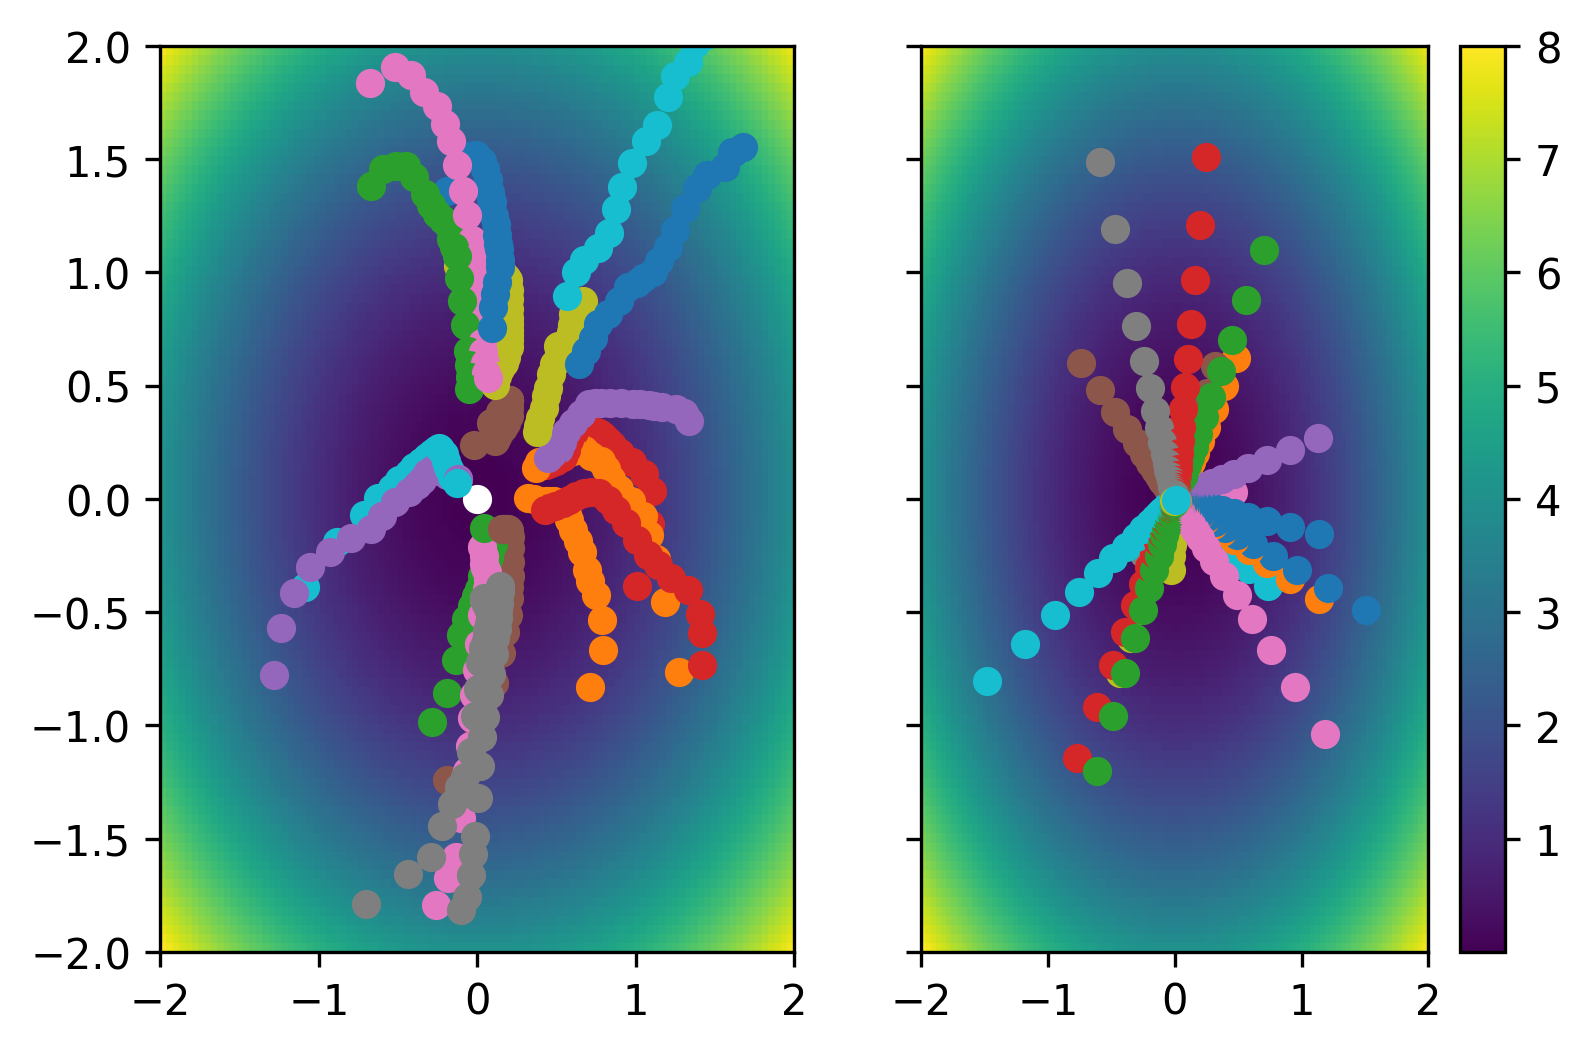

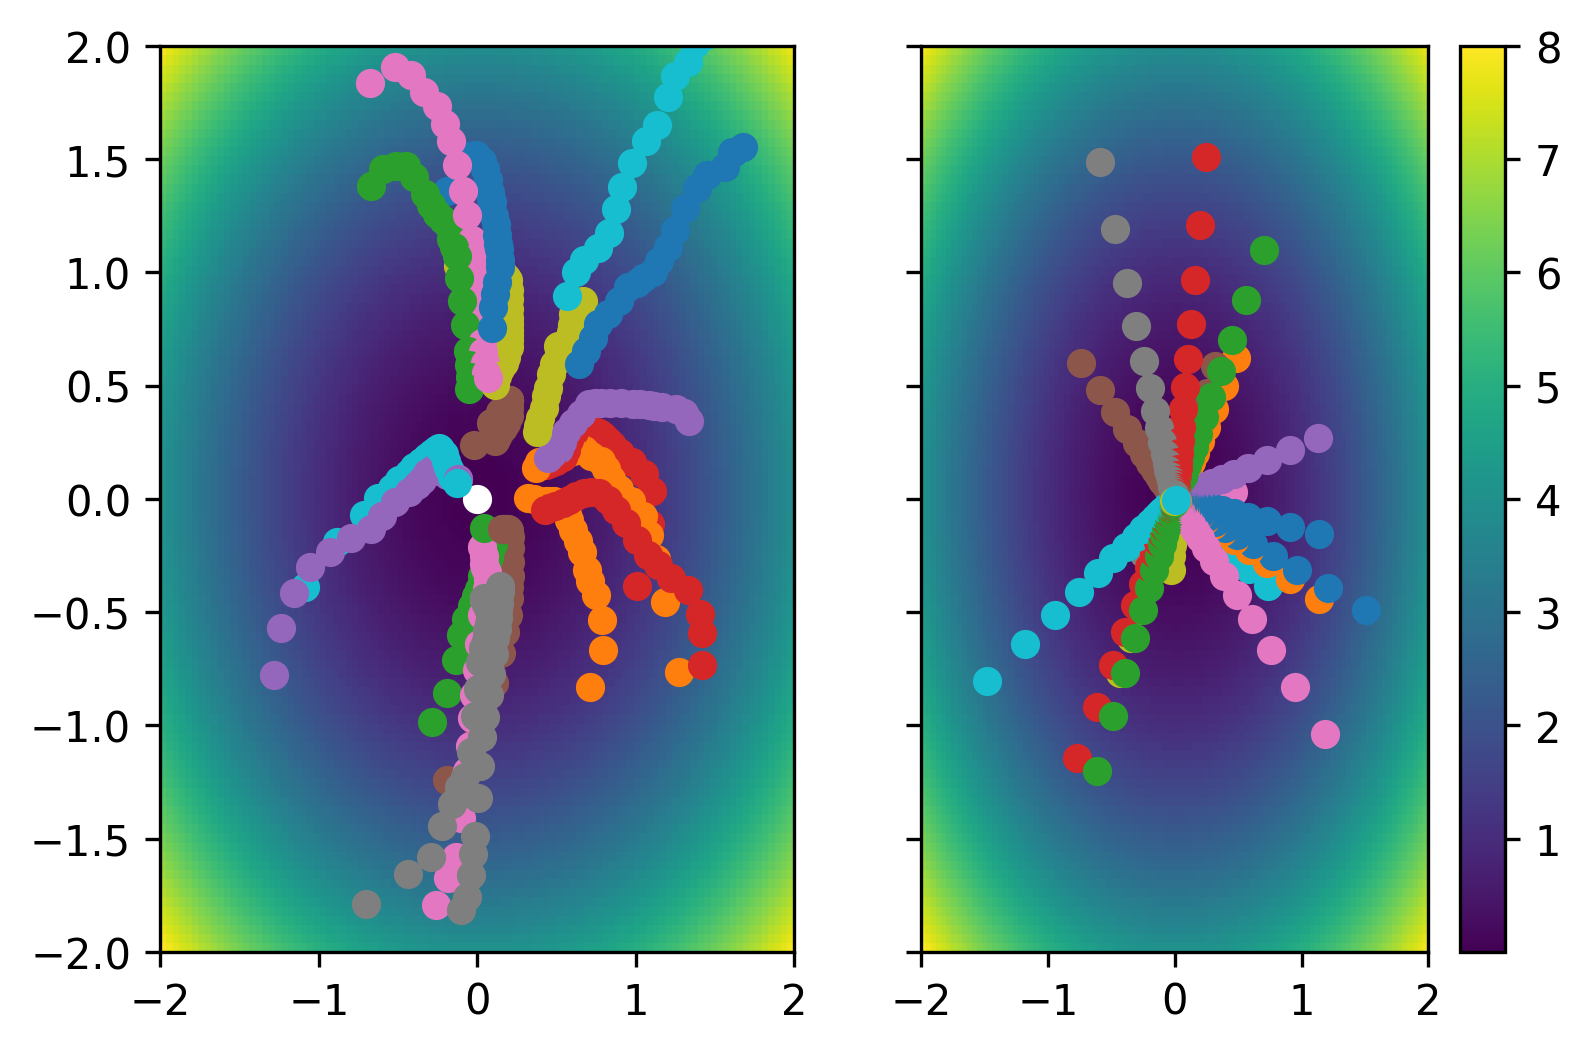

In [7]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
X, Y, Z = F('simple_convex')
p1 = ax1.pcolor(X, Y, Z)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
p2 = ax2.pcolor(X, Y, Z)


f.colorbar(p1)

x_min = np.min(Z, axis=0)
y_min = np.min(Z, axis=1)
ax1.scatter(0, 0, color='white')
ax2.scatter(0, 0, color='white')

ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)

for i in range(20):
    PSO.step()
    next(GD.gradient_descent(lr=0.1))

    for particle in PSO.get_particles():
        ax1.scatter(*particle)
        
    for particle in GD.particle_coordinates:
        ax2.scatter(*particle)
    display.clear_output(wait=True)
    display.display(f)

# Rosenbrock PSO vs GD

In [14]:
# Initial Setup
from optimizer import Optimizer
from function_classes import SimpleConvex, Rastrigin, Rosenbrock
from PSO import *
a, b = 0, 100
function = Rosenbrock(a, b)

GD = Optimizer()
GD.initialize_particles()
GD.set_benchmark_function(function)

PSO = SwarmOptimizer(n_particles=20, v_coeff=0.5, p_coeff=1, g_coeff=0.07)
PSO.set_objective_function(function)
PSO.get_population()

INFO:root:Particles initialized at: [[0.7589999999996961, 0.5729999999997166], [-0.14900000000020386, -0.629000000000151], [-0.6170000000001523, -0.3790000000001785], [-1.7420000000000284, 0.48999999999972577], [-1.428000000000063, 0.17299999999976068], [1.0199999999996674, -1.8950000000000116], [-0.47500000000016795, -0.07900000000021157], [-1.2020000000000879, 0.38099999999973777], [1.6009999999996034, -1.2090000000000871], [0.587999999999715, 1.3759999999996282], [-0.35900000000018073, -0.3520000000001815], [-1.3900000000000672, -0.6860000000001447], [-0.030000000000216964, 0.23299999999975407], [1.9599999999995639, -1.4690000000000585], [0.03199999999977621, -1.7590000000000265], [1.6699999999995958, 0.5289999999997215], [-1.0710000000001023, -0.05000000000021476], [-1.3150000000000754, -1.5060000000000544], [1.9459999999995654, -0.8210000000001298], [1.0639999999996625, 0.5859999999997152]]


[array([1.246, 0.957]),
 array([1.845, 0.347]),
 array([ 1.447, -1.784]),
 array([1.392, 1.378]),
 array([-0.376, -0.565]),
 array([-1.4  ,  0.451]),
 array([-1.641,  1.608]),
 array([-0.726, -0.927]),
 array([1.93 , 1.845]),
 array([-1.845,  0.705]),
 array([1.684, 1.745]),
 array([-0.387,  0.029]),
 array([ 0.865, -0.529]),
 array([1.053, 1.15 ]),
 array([1.452, 0.505]),
 array([ 0.345, -1.045]),
 array([-1.433,  1.039]),
 array([-1.888,  1.065]),
 array([-0.991,  0.945]),
 array([-1.605,  0.982])]

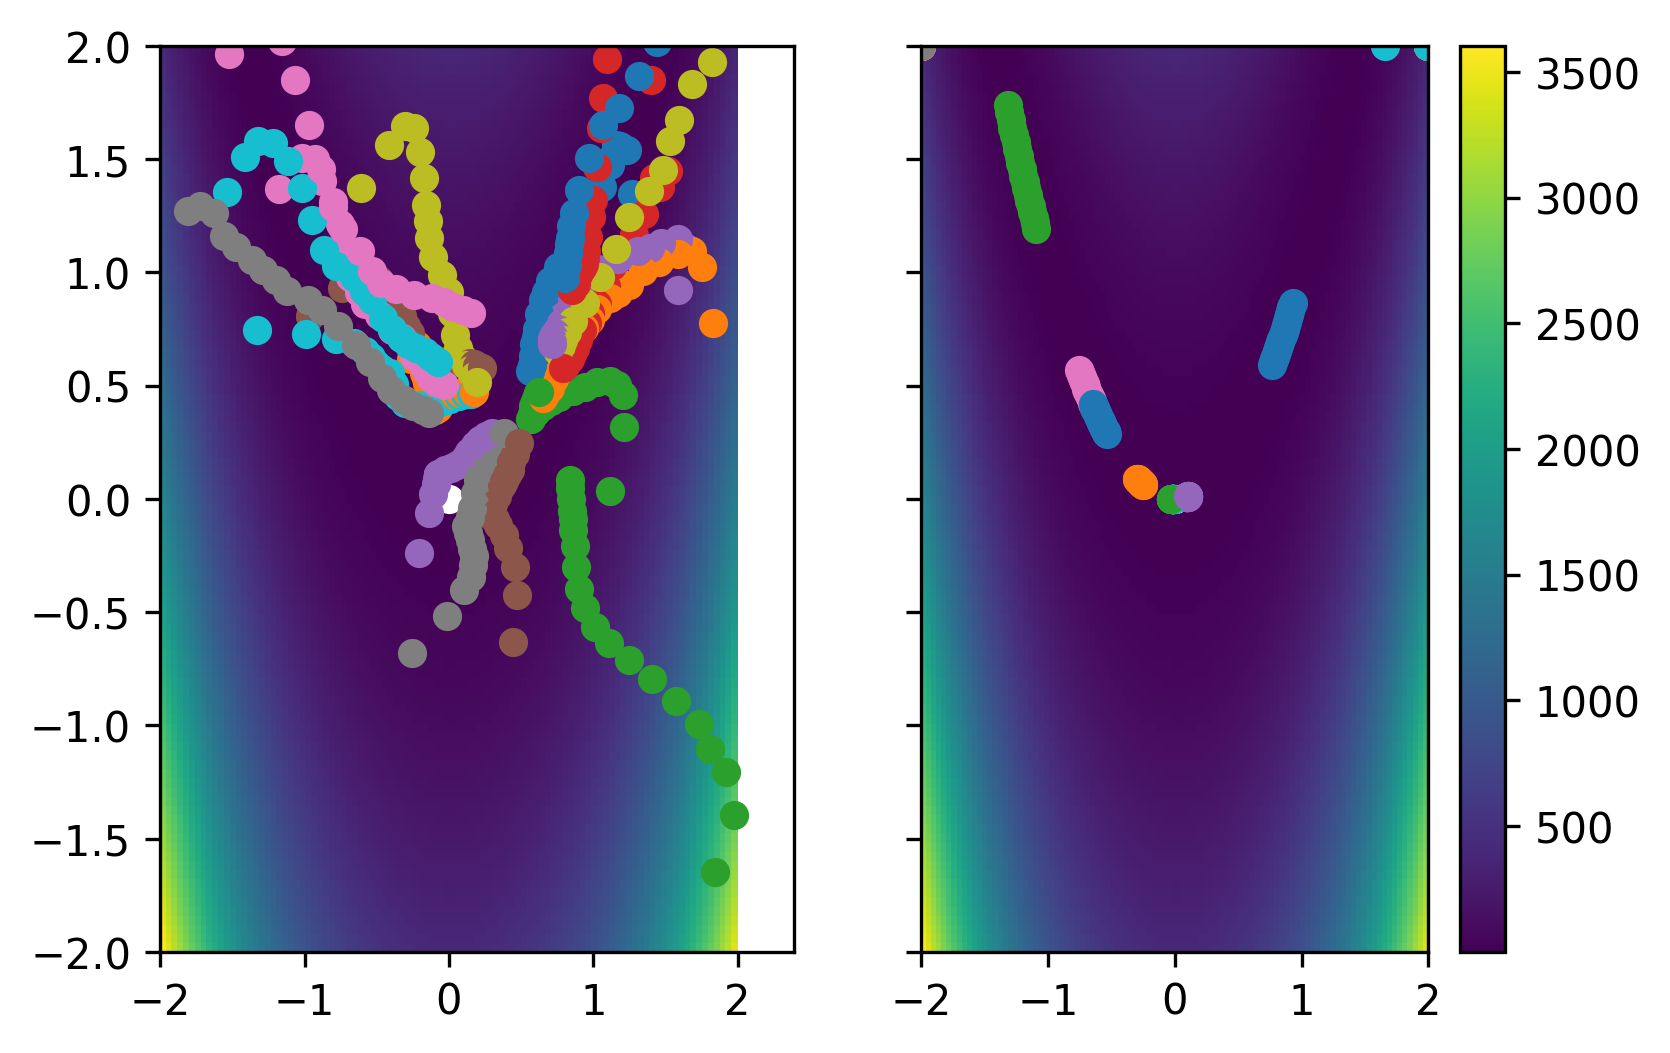

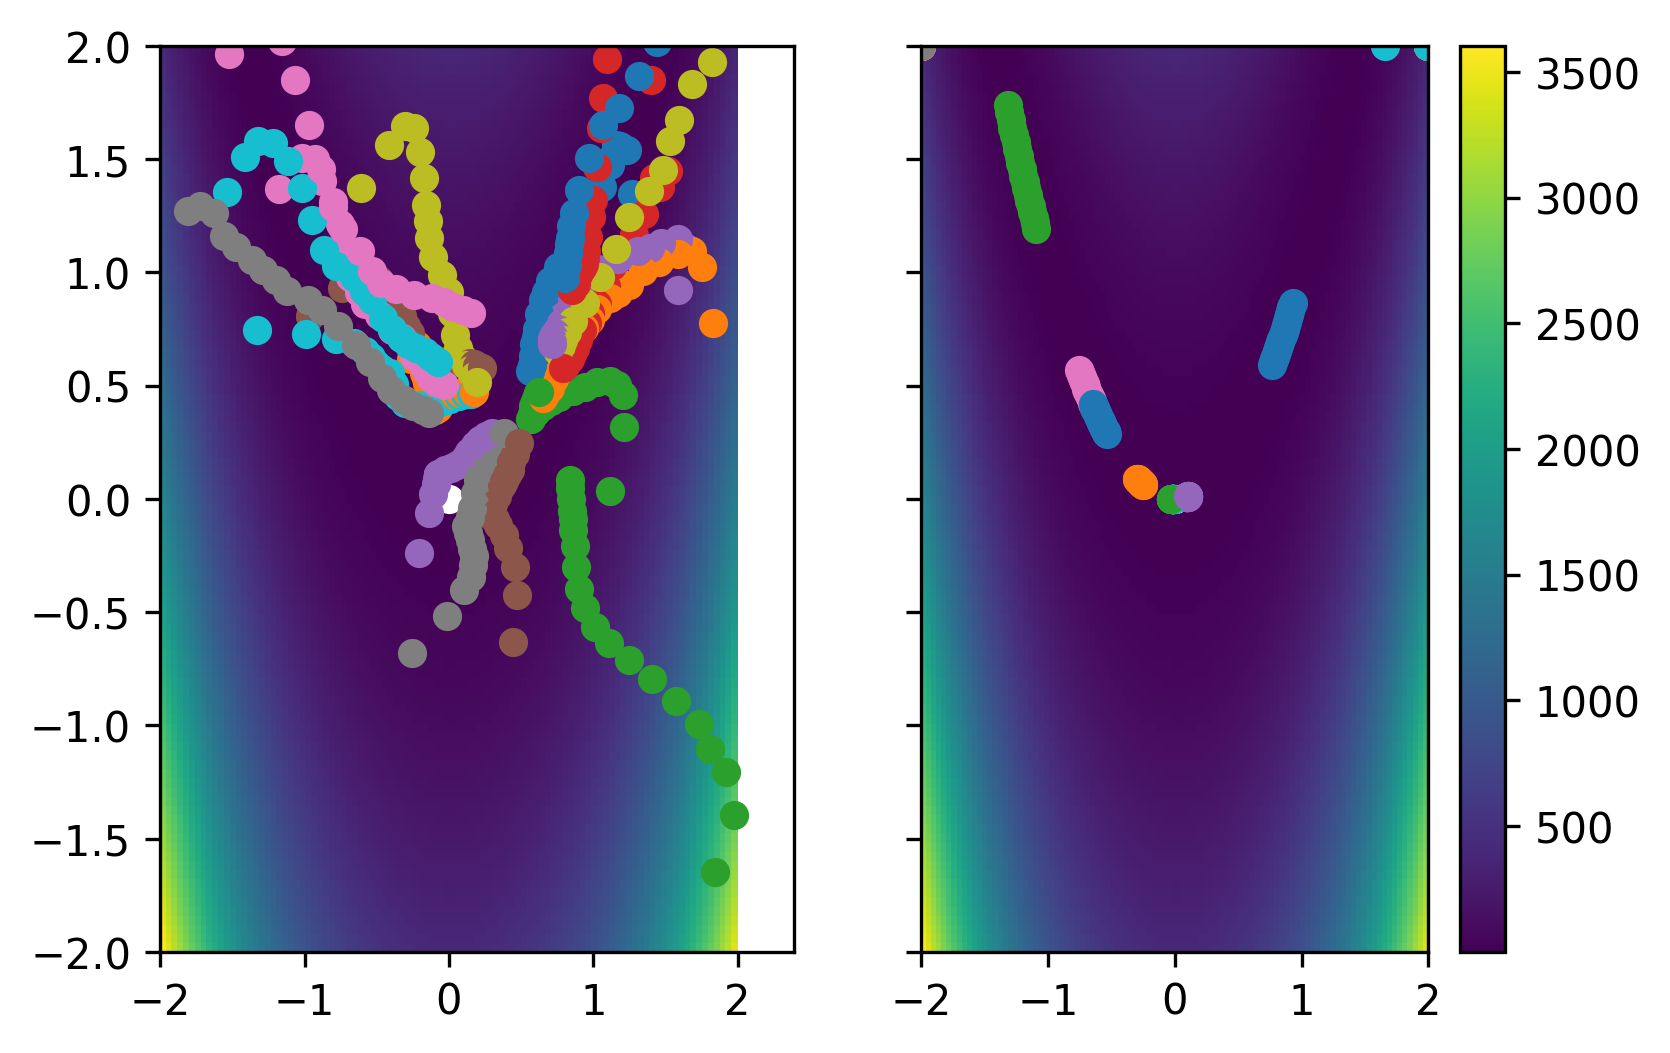

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
X, Y, Z = F('rosenbrock', rosen_a=a, rosen_b=b)
p1 = ax1.pcolor(X, Y, Z)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
p2 = ax2.pcolor(X, Y, Z)


f.colorbar(p1)

x_min = np.min(Z, axis=0)
y_min = np.min(Z, axis=1)
ax1.scatter(0, 0, color='white')
ax2.scatter(0, 0, color='white')

ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)


for i in range(20):
    PSO.step()
    next(GD.gradient_descent(lr=0.005))

    for particle in PSO.get_particles():
        ax1.scatter(*particle)
        
    for particle in GD.particle_coordinates:
        ax2.scatter(*particle)
    display.clear_output(wait=True)
    display.display(f)

# Rastrigin PSO vs GD

In [34]:
# Initial Setup
from optimizer import Optimizer
from function_classes import SimpleConvex, Rastrigin, Rosenbrock
from PSO import *
function = Rastrigin()

GD = Optimizer()
GD.initialize_particles()
GD.set_benchmark_function(function)

PSO = SwarmOptimizer(n_particles=20, v_coeff=0.5, p_coeff=1, g_coeff=0.07)
PSO.set_objective_function(function)
PSO.get_population()

INFO:root:Particles initialized at: [[-0.693000000000144, 0.26399999999975066], [-1.1570000000000928, -0.9420000000001165], [-1.919000000000009, 1.2519999999996418], [-1.056000000000104, 0.10299999999976839], [-1.5520000000000493, -0.947000000000116], [1.5249999999996118, -0.39800000000017643], [-1.2790000000000794, 1.013999999999668], [-0.07200000000021234, 0.9189999999996785], [-0.865000000000125, 0.6259999999997108], [0.25499999999975165, 1.2029999999996472], [-0.6450000000001492, -0.5160000000001634], [1.9559999999995643, -1.7680000000000256], [-1.6670000000000367, 0.41099999999973447], [-1.8110000000000208, 0.38499999999973733], [1.1659999999996513, 0.9019999999996804], [0.3199999999997445, -1.2340000000000844], [-1.2030000000000878, -1.2180000000000861], [-0.5620000000001584, -0.9220000000001187], [-1.1530000000000933, -1.4770000000000576], [-1.0850000000001008, 1.413999999999624]]


[array([ 1.737, -1.189]),
 array([1.738, 1.299]),
 array([ 1.202, -0.737]),
 array([0.213, 1.769]),
 array([1.873, 0.05 ]),
 array([-1.935, -1.877]),
 array([1.304, 0.978]),
 array([ 1.802, -1.93 ]),
 array([ 1.64 , -1.208]),
 array([-1.828, -1.81 ]),
 array([-1.164, -1.927]),
 array([0.248, 1.809]),
 array([ 1.376, -1.18 ]),
 array([0.386, 1.338]),
 array([ 1.034, -0.94 ]),
 array([1.854, 1.008]),
 array([0.594, 0.356]),
 array([-0.673,  1.09 ]),
 array([-0.642, -0.94 ]),
 array([ 1.609, -1.801])]

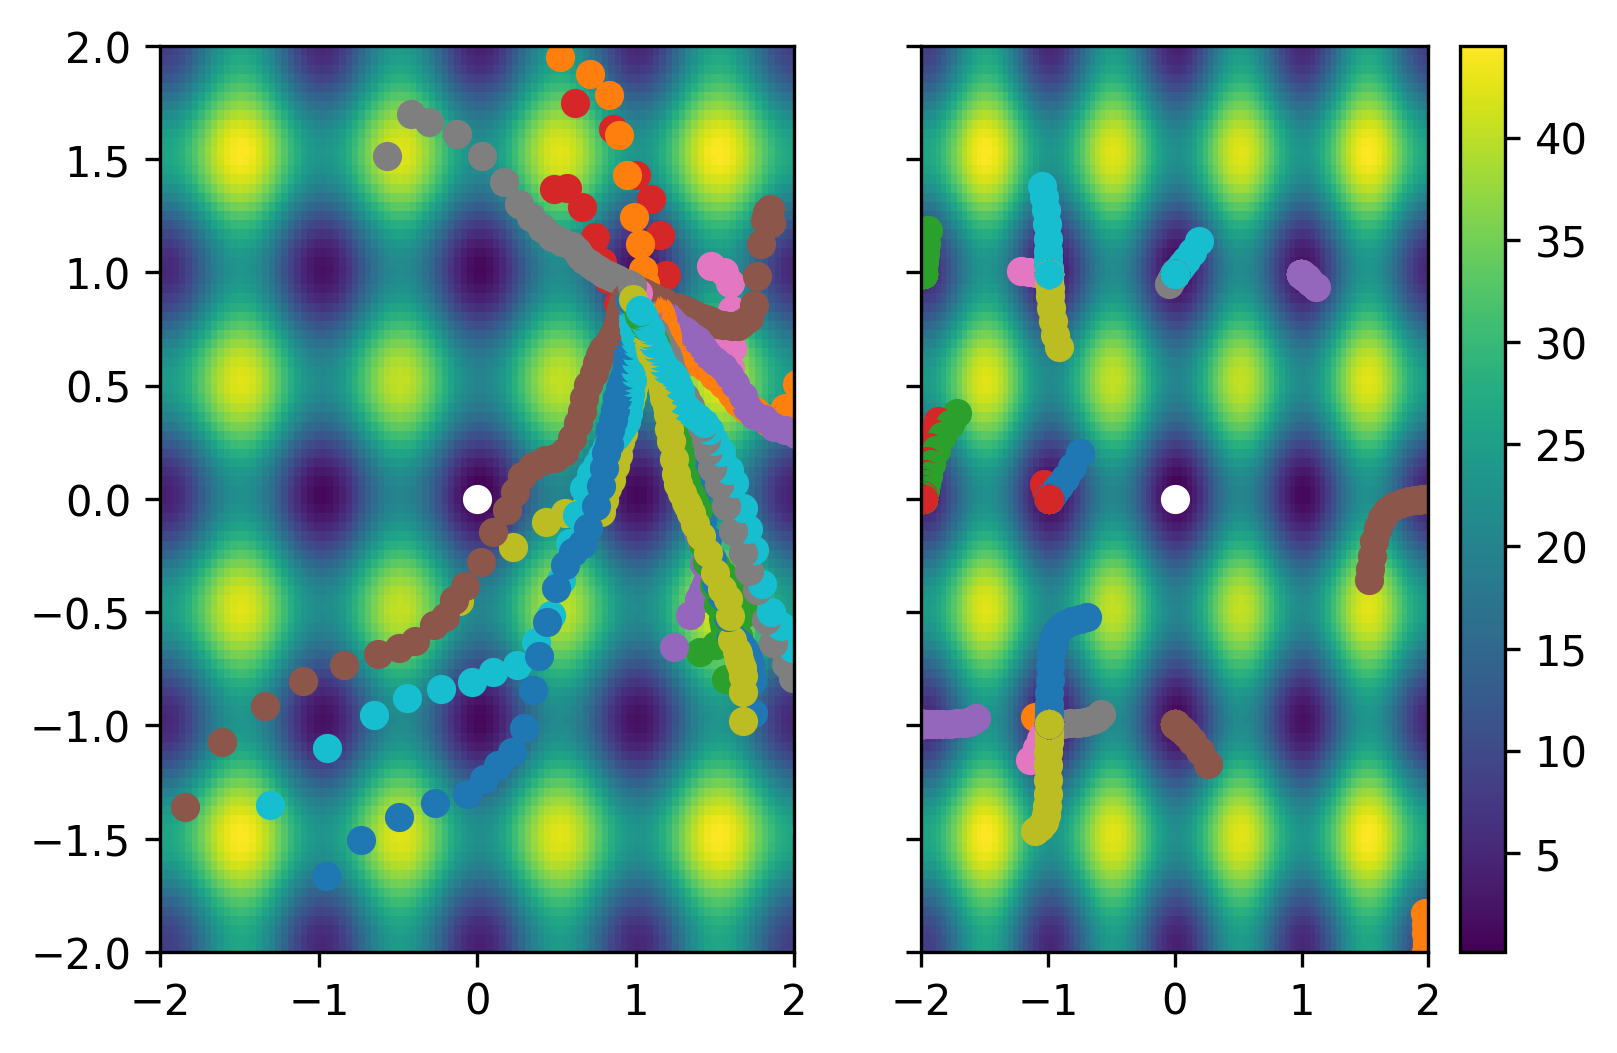

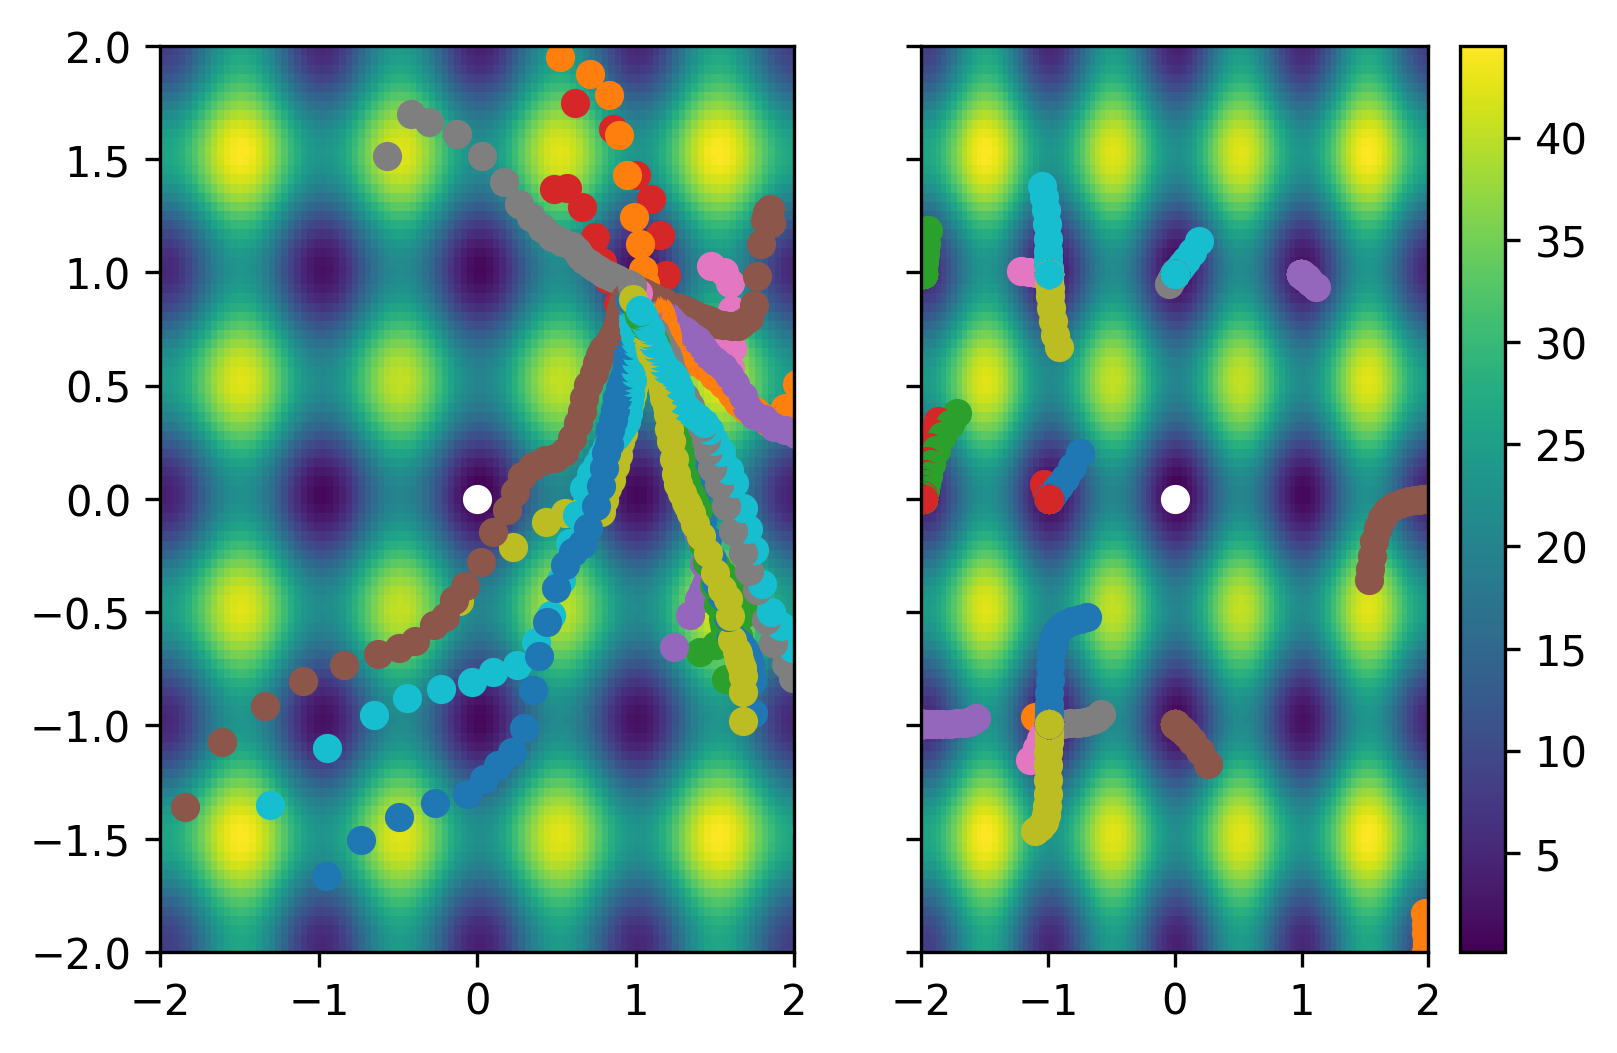

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
X, Y, Z = F('rastrigin')
p1 = ax1.pcolor(X, Y, Z)
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
p2 = ax2.pcolor(X, Y, Z)


f.colorbar(p1)

x_min = np.min(Z, axis=0)
y_min = np.min(Z, axis=1)
ax1.scatter(0, 0, color='white')
ax2.scatter(0, 0, color='white')

ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)


for i in range(50):
    PSO.step()
    next(GD.gradient_descent(lr=0.001))

    for particle in PSO.get_particles():
        ax1.scatter(*particle)
        
    for particle in GD.particle_coordinates:
        ax2.scatter(*particle)
    display.clear_output(wait=True)
    display.display(f)